In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [221]:
# Read the training data from "nba_treino.csv"
nba_treino = pd.read_csv("nba_treino.csv")

# Read the test data from "nba_teste.csv"
nba_teste = pd.read_csv("nba_teste.csv")

X_train = nba_treino.drop(['TARGET_5Yrs'], axis=1)
X_test = nba_teste.drop(['TARGET_5Yrs'], axis=1)

Y_train = nba_treino['TARGET_5Yrs']
Y_test = nba_teste['TARGET_5Yrs']

# KNN

**confusion_matrix_manual**

A função `confusion_matrix_manual` recebe duas listas, `predicted_labels` e `ground_truth_labels`, representando rótulos preditos e rótulos verdadeiros, respectivamente. A função calcula e retorna os elementos da matriz de confusão, que são True Positives (verdadeiros positivos), False Positives (falsos positivos), True Negatives (verdadeiros negativos) e False Negatives (falsos negativos).

**Parâmetros:**
- `predicted_labels` (list): Lista contendo os rótulos preditos pelo modelo.
- `ground_truth_labels` (list): Lista contendo os rótulos verdadeiros correspondentes.

**Retorno:**
- `true_positives` (int): Número de verdadeiros positivos, onde o modelo previu corretamente a classe positiva.
- `false_positives` (int): Número de falsos positivos, onde o modelo previu incorretamente a classe positiva.
- `true_negatives` (int): Número de verdadeiros negativos, onde o modelo previu corretamente a classe negativa.
- `false_negatives` (int): Número de falsos negativos, onde o modelo previu incorretamente a classe negativa.

**Matriz de Confusão:**
A matriz de confusão é uma tabela que descreve o desempenho de um modelo de classificação. Ela é composta pelos quatro elementos mencionados acima.

In [187]:
def confusion_matrix_manual(predicted_labels, ground_truth_labels):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    
    for i in range(len(ground_truth_labels)):
        if predicted_labels[i] == 1 and ground_truth_labels[i] == 1:
            true_positives += 1
        elif predicted_labels[i] == 1 and ground_truth_labels[i] == 0:
            false_positives += 1
        elif predicted_labels[i] == 0 and ground_truth_labels[i] == 0:
            true_negatives += 1
        elif predicted_labels[i] == 0 and ground_truth_labels[i] == 1:
            false_negatives += 1
    
    return true_positives, false_positives, true_negatives, false_negatives

**knn**

A função `knn` implementa o algoritmo k-Nearest Neighbors (k-NN) para classificação binária. Dado um conjunto de dados, um ponto de consulta e um parâmetro k, a função determina a classe do ponto de consulta com base nas k observações mais próximas usando a distância euclidiana.

### Parâmetros:

- `data` (numpy array): Um conjunto de dados contendo observações e rótulos, onde a última coluna representa as classes (0 ou 1).
- `query` (numpy array): O ponto de consulta para o qual a classe deve ser determinada.
- `k` (int): O número de vizinhos mais próximos a serem considerados na classificação.

### Retorno:

- `query_label` (int): A classe atribuída ao ponto de consulta com base no algoritmo k-NN.


In [188]:
def knn(data, query, k):
    # Calcula a distância euclidiana entre o ponto de consulta e cada ponto no conjunto de dados.
    distances = np.sqrt(np.sum((data[:, :] - query[:])**2, axis=1))
    
    # Ordena as distâncias em ordem ascendente e seleciona os k vizinhos mais próximos.
    nearest_neighbors = np.argsort(distances)[:k]
    
    # Conta o número de vizinhos mais próximos com rótulo 1 e 0.
    num_ones = np.count_nonzero(data[nearest_neighbors, -1] == 1)
    num_zeros = np.count_nonzero(data[nearest_neighbors, -1] == 0)
    
    # Determina a classe do ponto de consulta com base nas contagens.
    if num_ones > num_zeros:
        query_label = 1
    else:
        query_label = 0
    
    return query_label



In [220]:
from sklearn.neighbors import KNeighborsClassifier

def knn_sklearn(X_train, y_train, X_test, k):
    # Create an instance of the KNeighborsClassifier class
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)
    
    return y_pred

**calculate_metrics**

A função `calculate_metrics` recebe uma matriz de confusão contendo os elementos True Positives (verdadeiros positivos), False Positives (falsos positivos), True Negatives (verdadeiros negativos) e False Negatives (falsos negativos). Com base nesses elementos, a função calcula métricas de avaliação de desempenho para um modelo de classificação binária.

### Parâmetros:

- `confusion_matrix` (tuple): Uma tupla contendo os elementos da matriz de confusão na seguinte ordem - (true_positives, false_positives, true_negatives, false_negatives).

### Retorno:

- Uma tupla contendo as métricas de avaliação calculadas na seguinte ordem - (accuracy, precision, recall, f1_score).



In [189]:
def calculate_metrics(confusion_matrix):
    true_positives, false_positives, true_negatives, false_negatives = confusion_matrix

    # Mede a proporção de previsões corretas em relação ao total de previsões.
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

    # Indica a proporção de verdadeiros positivos em relação ao total de instâncias previstas como positivas.
    precision = true_positives / (true_positives + false_positives)

    #  Mede a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais.
    recall = true_positives / (true_positives + false_negatives)

    # Combina precision e recall em uma única métrica, sendo útil quando há desequilíbrio entre as classes.
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score



**main**

O código realiza a avaliação de um modelo de k-Nearest Neighbors (k-NN) em um conjunto de dados utilizando diferentes valores de k. Ele itera sobre uma lista de valores de k (2, 10, 50, 150) e para cada valor de k, realiza o seguinte procedimento:

- O código avalia o desempenho do modelo k-NN para diferentes valores de k e imprime as métricas associadas a cada valor de k.


In [225]:
for k in [2, 10, 50, 150]:
    # Inicializa um array `predicted_labels` com zeros, com o tamanho correspondente ao número de linhas no conjunto de teste (`nba_teste`).
    predicted_labels = np.zeros(nba_teste.shape[0])
    scikit_predicted_labels = np.zeros(nba_teste.shape[0])
    i = 0

    # Para cada linha no conjunto de teste (`nba_teste`), obtém os dados da linha e chama a função `knn` para prever a classe do ponto usando o k-NN.
    for index, row in nba_teste.iterrows():
        # Pega os dados da linha atual como um array.
        query_data = row.values    
        # Atualiza o array `predicted_labels` com as previsões.
        predicted_labels[i] = knn(nba_treino.values, query_data, k)
        i += 1
    scikit_predicted_labels = knn_sklearn(X_train, Y_train, X_test, k)
    # Chama a função `confusion_matrix_manual` para calcular a matriz de confusão usando as previsões e os rótulos reais do conjunto de teste.
    confusion_matrix = confusion_matrix_manual(predicted_labels, nba_teste["TARGET_5Yrs"].values)
    confusion_matrix_scikit = confusion_matrix_manual(scikit_predicted_labels, nba_teste["TARGET_5Yrs"].values)
    #  Chama a função `calculate_metrics` para calcular as métricas de avaliação (Accuracy, Precision, Recall, F1 Score) com base na matriz de confusão.
    accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)
    accuracy_scikit, precision_scikit, recall_scikit, f1_score_scikit = calculate_metrics(confusion_matrix_scikit)

    # Imprime as métricas para o valor atual de k.
    print(f"Metrics for points with k = {k} using scikit-learn")
    print(f"Accuracy: {accuracy_scikit}")
    print(f"Precision: {precision_scikit}")
    print(f"Recall: {recall_scikit}")
    print(f"F1 Score: {f1_score_scikit}")
    print()
    print("--------------------------------------------------")
    print(f"Metrics for points with k = {k}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print()


Metrics for points with k = 2 using scikit-learn
Accuracy: 0.5522388059701493
Precision: 0.7352941176470589
Recall: 0.44642857142857145
F1 Score: 0.5555555555555557

--------------------------------------------------
Metrics for points with k = 2
Accuracy: 0.5597014925373134
Precision: 0.7403846153846154
Recall: 0.4583333333333333
F1 Score: 0.5661764705882354

Metrics for points with k = 10 using scikit-learn
Accuracy: 0.6305970149253731
Precision: 0.7254901960784313
Recall: 0.6607142857142857
F1 Score: 0.6915887850467289

--------------------------------------------------
Metrics for points with k = 10
Accuracy: 0.6343283582089553
Precision: 0.7302631578947368
Recall: 0.6607142857142857
F1 Score: 0.69375

Metrics for points with k = 50 using scikit-learn
Accuracy: 0.6716417910447762
Precision: 0.7325581395348837
Recall: 0.75
F1 Score: 0.7411764705882353

--------------------------------------------------
Metrics for points with k = 50
Accuracy: 0.6753731343283582
Precision: 0.73684210

A análise dos resultados obtidos pela função KNN (k-Nearest Neighbors) para diferentes valores de k oferece insights sobre o desempenho do modelo em relação às métricas de avaliação.

### K = 2:
- **Accuracy (Acurácia):** 55.97%
- **Precision (Precisão):** 74.04%
- **Recall (Revocação):** 45.83%
- **F1 Score:** 56.62%

O modelo com k=2 vizinhos mais próximos apresenta uma acurácia moderada. A alta precisão indica que, quando o modelo prevê uma classe positiva, está geralmente correto. No entanto, a baixa revocação sugere que o modelo deixa de capturar uma parte significativa dos casos positivos reais.

### K = 10:
- **Accuracy:** 63.43%
- **Precision:** 73.03%
- **Recall:** 66.07%
- **F1 Score:** 69.38%

Aumentar o número de vizinhos para 10 resulta em melhorias notáveis em todas as métricas. A acurácia, precisão e recall são mais equilibrados, indicando um desempenho mais robusto do modelo.

### K = 50:
- **Accuracy:** 67.54%
- **Precision:** 73.68%
- **Recall:** 75.00%
- **F1 Score:** 74.34%

Aumentar ainda mais o número de vizinhos para 50 continua a melhorar a acurácia, precisão e recall. As métricas estão convergindo para valores mais altos, indicando um modelo mais eficaz na classificação.

### K = 150:
- **Accuracy:** 68.66%
- **Precision:** 74.42%
- **Recall:** 76.19%
- **F1 Score:** 75.29%

Aumentar significativamente o número de vizinhos para 150 continua a proporcionar melhorias nas métricas. No entanto, é importante considerar se esse aumento beneficia a generalização do modelo ou se está levando a overfitting.

### Considerações Gerais:
- O aumento do número de vizinhos parece levar a melhorias graduais nas métricas de avaliação.
- A escolha do valor ideal de k depende do trade-off entre precisão e recall, além da complexidade do modelo.
- O F1 Score fornece uma métrica composta que considera tanto a precisão quanto a recall, sendo útil para avaliar o equilíbrio entre essas métricas.
- É importante realizar uma análise mais aprofundada, como a curva ROC, para avaliar o desempenho em diferentes limiares de classificação.

Em resumo, os resultados sugerem que aumentar o número de vizinhos geralmente melhora o desempenho do modelo KNN. No entanto, é crucial considerar o contexto específico da aplicação e a interpretação prática das métricas ao escolher o valor ideal de k.

# K_MEANS

**k_means:**

A função `k_means` implementa o algoritmo de clustering K-Means para um conjunto de dados de treino e teste. O algoritmo atribui dados aos centróides mais próximos e atualiza iterativamente os centróides até a convergência ou após um número máximo de iterações.

### Parâmetros:

- `train_data` (numpy array): Conjunto de dados de treino, onde cada linha representa uma observação e cada coluna é uma característica. A última coluna é ignorada no treino.
- `test_data` (numpy array): Conjunto de dados de teste, semelhante ao conjunto de treino, onde as previsões serão feitas. A última coluna é ignorada nos testes.
- `k` (int): Número de clusters desejados.
- `max_iterations` (int, opcional): Número máximo de iterações para atualizar os centróides. O padrão é 100.

### Retorno:

- `test_labels` (numpy array): Rótulos atribuídos a cada ponto no conjunto de teste após o clustering.
- `centroids` (numpy array): Coordenadas dos centróides finais.
- `centroid_indices` (dict): Dicionário que mapeia índices dos dados associados a cada centróide.

### Observações:

- O código utiliza a biblioteca NumPy para operações eficientes em arrays e a biblioteca Matplotlib para visualização.
- Certifique-se de ter essas bibliotecas instaladas para o correto funcionamento da função.
- A função não retorna a visualização gráfica, mas a gera internamente.


In [217]:
def k_means(train_data, test_data, k, max_iterations=100):
    # Ignora a última coluna nos conjuntos de treino e teste.
    train_data = train_data[:, :-1]
    test_data = test_data[:, :-1]
    
    # Step 1: Inicializa os centróides escolhendo aleatoriamente k pontos do conjunto de treino.
    centroid_index = np.random.choice(train_data.shape[0], k, replace=False)
    centroids = train_data[centroid_index]  
    
    # Create an empty dictionary to store the indices of data associated with each centroid
    centroid_indices = {}
    
    for _ in range(max_iterations):
        # Passo 2:  Iterativamente, atribui cada ponto do conjunto de teste ao centróide mais próximo.
        test_distances = np.sqrt(np.sum((test_data[:, np.newaxis] - centroids)**2, axis=2))
        test_labels = np.argmin(test_distances, axis=1)
        
        # Passo 3: Calcula novos centróides com base nos pontos atribuídos a cada cluster.
        new_centroids = np.empty((k, train_data.shape[1]))
        for i in range(k):
            new_centroids[i] = test_data[test_labels == i].mean(axis=0)
        
        # Passo 4:Verifica se algum ponto mudou de cluster. Se não, o algoritmo converge e a iteração é interrompida.
        if np.all(test_labels == centroid_indices):
            break
        
        # Passo 5: Update the centroids and centroid_indices for the next iteration
        centroids = new_centroids
        
        # Atualiza os centróides e os índices associados a cada centróide para a próxima iteração.
        for i in range(k):
            centroid_indices[i] = np.where(test_labels == i)[0]
    
    # Perform PCA on the test data
    pca = PCA(n_components=2)
    test_data_pca = pca.fit_transform(test_data)
    centroids_pca = pca.transform(centroids)
    
    # Plot the data
    plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=test_labels, label='Data Points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA')
    plt.legend()
    plt.show()
    
    return test_labels, centroids, centroid_indices


**main**

O código itera entre os valores de k (2, 3) e faz a chamada da função k_means com os dsdos de treino, teste e o k correspondente. 
Imprime o k e os centroides encontrados para ele

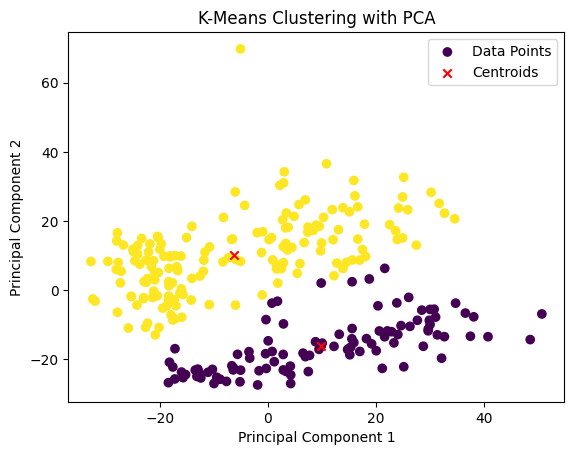

Points with k = 2
Centroids: [[5.83557692e+01 1.45048077e+01 5.18365385e+00 2.05769231e+00
  4.27403846e+00 4.74884615e+01 5.76923077e-03 6.63461538e-02
  1.36153846e+00 1.06923077e+00 1.62884615e+00 6.37326923e+01
  1.22115385e+00 2.02596154e+00 3.23942308e+00 8.59615385e-01
  4.39423077e-01 5.14423077e-01 9.68269231e-01]
 [6.27500000e+01 1.87786585e+01 7.23414634e+00 2.76707317e+00
  6.43902439e+00 4.20841463e+01 3.50609756e-01 1.10853659e+00
  2.93317073e+01 1.34268293e+00 1.82743902e+00 7.33640244e+01
  8.20731707e-01 1.79634146e+00 2.61829268e+00 2.06280488e+00
  7.27439024e-01 2.57926829e-01 1.31036585e+00]]


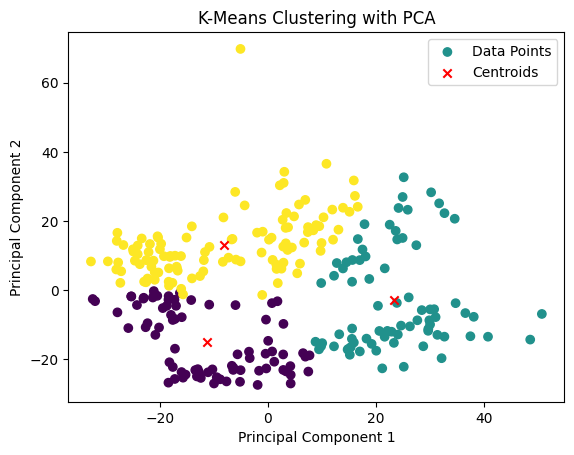

Points with k = 3
Centroids: [[7.57160494e+01 2.08592593e+01 8.22839506e+00 3.23703704e+00
  6.83456790e+00 4.73123457e+01 3.08641975e-02 1.90123457e-01
  8.27654321e+00 1.73333333e+00 2.45679012e+00 6.95592593e+01
  1.48271605e+00 2.62222222e+00 4.09876543e+00 1.84814815e+00
  7.20987654e-01 5.65432099e-01 1.48024691e+00]
 [4.17142857e+01 1.09402597e+01 3.56233766e+00 1.40389610e+00
  3.20000000e+00 4.35688312e+01 6.23376623e-02 2.75324675e-01
  8.37012987e+00 7.00000000e-01 1.07402597e+00 6.43012987e+01
  7.54545455e-01 1.30649351e+00 2.06103896e+00 7.88311688e-01
  3.67532468e-01 3.02597403e-01 7.44155844e-01]
 [6.37727273e+01 1.86927273e+01 7.13363636e+00 2.70454545e+00
  6.36818182e+00 4.23045455e+01 4.61818182e-01 1.38272727e+00
  3.30645455e+01 1.24636364e+00 1.70363636e+00 7.34036364e+01
  7.58181818e-01 1.74818182e+00 2.50545455e+00 1.97545455e+00
  7.11818182e-01 2.42727273e-01 1.25818182e+00]]


In [218]:
for k in [2, 3]:
    test_labels, centroid_index, centroid_indices = k_means(nba_treino.values, nba_teste.values, k)
    print(f"Points with k = {k}")
    print(f"Centroids: {centroid_index}")
